In [1]:
# increase the width of the notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### HELLENIC OPEN UNIVERSITY - SCHOOL OF SCIENCE AND TECHNOLOGY
### DATA SCIENCE AND MACHINE LEARNING : DAMA61 ACAD. YEAR 2023-24

#### <center> WRITTEN ASSIGNMENT 4 - SOLUTIONS </center>

### Problem 1

Work with the MNIST dataset and:</br>
1) Split it into a training (5/7), a validation (1/7), and a test (1/7) set.</br>
2) Use Keras to built a feed-forward neural network that contains three hidden dense layers of 50 nodes each.</br>
3) Compile the model using the Adam optimizer, a loss function of your choice and add accuracy in your metrics.</br>
4) What is the number of the trainable parameters of your model?</br>
5) Fit the model on the training data (allow 100 epochs) and use early stopping with patience 5 epochs to monitor the validation set.</br>
6) Plot the history of the loss and accuracy of the training process for the training and the validation set. </br>
7) What is the accuracy of your model on the test set?</br>
<i>Feel free to take any action needed to solve this problem.</i>

In [2]:
# import the needed packages
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense

In [3]:
# read the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# split and normalize the training, validation and test sets
X_train, y_train = X_train_full[:-10000]/255., y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:]/255., y_train_full[-10000:]
X_test = X_test/255.

In [6]:
# fix the random numbers generator (it would be better to fix also the random.seed and np.random.seed)
# np.random.seed(42)
tf.random.set_seed(42)

# create a sequantial model of an input, three hidden and an output layer
model = Sequential()
model.add(InputLayer(input_shape=[28, 28]))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 44860 (175.23 KB)
Trainable params: 44860 (175.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model contains 44,860 trainable parameters.

In [8]:
# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 1s 664us/step - loss: 0.3230 - accuracy: 0.9020 - val_loss: 0.1686 - val_accuracy: 0.9494
Epoch 2/100
1563/1563 [==============================] - 1s 629us/step - loss: 0.1450 - accuracy: 0.9567 - val_loss: 0.1439 - val_accuracy: 0.9560
Epoch 3/100
1563/1563 [==============================] - 1s 622us/step - loss: 0.1068 - accuracy: 0.9670 - val_loss: 0.1096 - val_accuracy: 0.9677
Epoch 4/100
1563/1563 [==============================] - 1s 652us/step - loss: 0.0850 - accuracy: 0.9736 - val_loss: 0.1317 - val_accuracy: 0.9613
Epoch 5/100
1563/1563 [==============================] - 1s 669us/step - loss: 0.0709 - accuracy: 0.9779 - val_loss: 0.1097 - val_accuracy: 0.9678
Epoch 6/100
1563/1563 [==============================] - 1s 628us/step - loss: 0.0612 - accuracy: 0.9805 - val_loss: 0.1264 - val_accuracy: 0.9655
Epoch 7/100
1563/1563 [==============================] - 1s 638us/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0

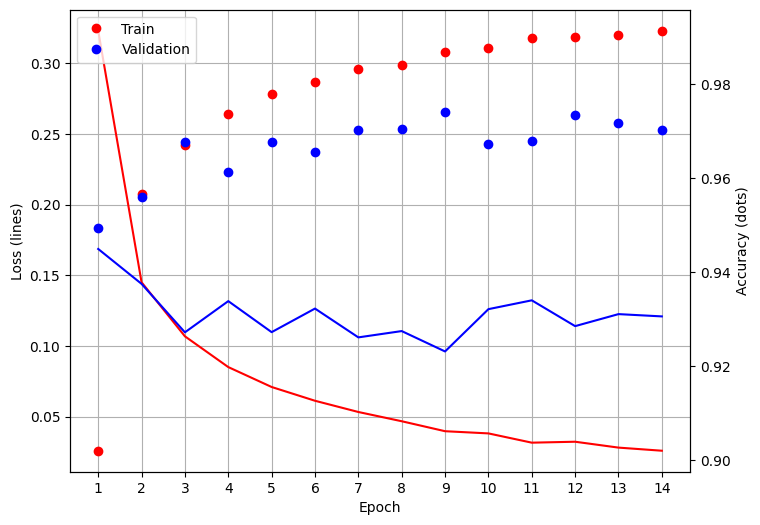

In [10]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 [==============================] - 0s 303us/step - loss: 0.0990 - accuracy: 0.9718

The accuracy on the test set is: 97.2%


### Problem 2

Repeat the steps in Problem 1, but now use 200 nodes in each hidden layer and a regularization method of your choice to avoid over-fitting. Compare your results with those from Problem 1.

In [12]:
# let's try to increase the number of nodes of each hidden layer
# without adding any extra regularization method
# fix the random numbers generator (it would be better to fix also the random.seed and np.random.seed)
tf.random.set_seed(42)

# create a sequantial model of an input, three hidden and an output layer
model = Sequential()
model.add(InputLayer(input_shape=[28, 28]))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               157000    
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 200)               40200     
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 239410 (935.20 KB)
Trainable params: 239410 (935.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# we will use again the early stopping method
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2305 - accuracy: 0.9289 - val_loss: 0.1294 - val_accuracy: 0.9596
Epoch 2/100
1563/1563 [==============================] - 2s 973us/step - loss: 0.1000 - accuracy: 0.9693 - val_loss: 0.1136 - val_accuracy: 0.9645
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0693 - accuracy: 0.9785 - val_loss: 0.1004 - val_accuracy: 0.9709
Epoch 4/100
1563/1563 [==============================] - 2s 979us/step - loss: 0.0531 - accuracy: 0.9839 - val_loss: 0.1144 - val_accuracy: 0.9708
Epoch 5/100
1563/1563 [==============================] - 2s 961us/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0930 - val_accuracy: 0.9752
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.1110 - val_accuracy: 0.9740
Epoch 7/100
1563/1563 [==============================] - 2s 966us/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0987 

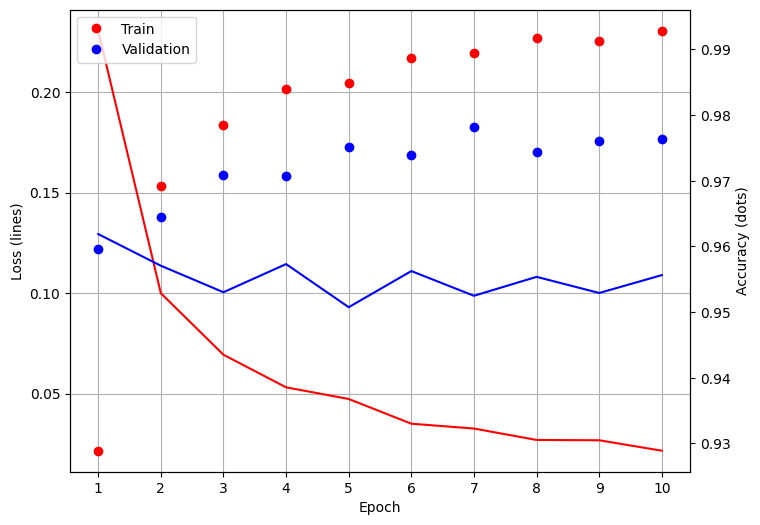

In [15]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

#### Comment:
The training process stopped after 9 epochs as the model began to overfit the training data in the fourth epoch.

In [16]:
# let's incorporate a regularization method such as Dropout to address the issue of overfitting during the training process.
from tensorflow.keras.layers import Dropout

In [27]:
# fix the random numbers generator (it would be better to fix also the random.seed and np.random.seed)
tf.random.set_seed(42)

# create a sequantial model of an input, three hidden and an output layer
model = Sequential()
model.add(InputLayer(input_shape=[28, 28]))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(200, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(200, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation="softmax"))

# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 200)               157000    
                                                                 
 dropout_9 (Dropout)         (None, 200)               0         
                                                                 
 dense_21 (Dense)            (None, 200)               40200     
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 200)               40200     
                                                                 
 dropout_11 (Dropout)        (None, 200)              

In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3377 - accuracy: 0.8962 - val_loss: 0.1250 - val_accuracy: 0.9636
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1685 - accuracy: 0.9498 - val_loss: 0.1004 - val_accuracy: 0.9690
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1328 - accuracy: 0.9605 - val_loss: 0.0958 - val_accuracy: 0.9730
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1138 - accuracy: 0.9658 - val_loss: 0.0896 - val_accuracy: 0.9767
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0971 - accuracy: 0.9704 - val_loss: 0.0872 - val_accuracy: 0.9762
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0911 - accuracy: 0.9724 - val_loss: 0.0951 - val_accuracy: 0.9745
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 0.1017 - val_ac

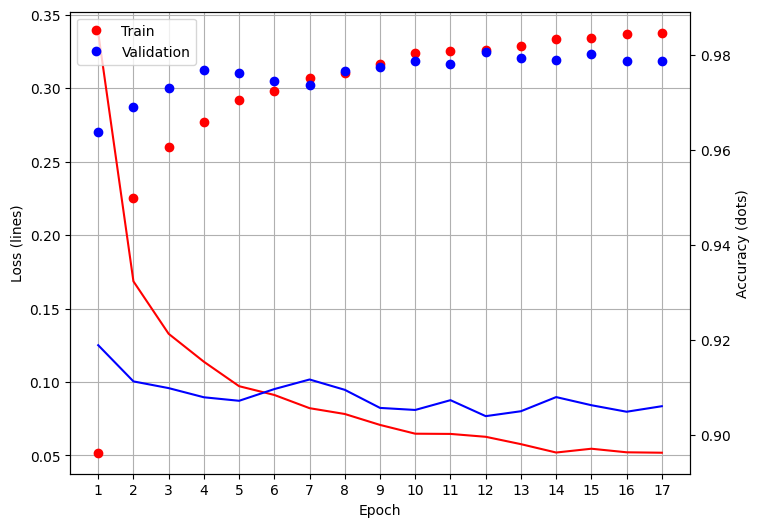

In [30]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

#### Comment:

Both models with 200 nodes per hidden layer outperform the model with 50 nodes per hidden layer. Additionally, by utilizing a regularization method, the model avoid overfitting and exhibits improved learning curves. Consequently, the regularized model achieves better results on the test set compared to the model without regularization.